Sample size: 100


100%|██████████| 100/100 [00:00<00:00, 9079.37it/s]

Game Over! P1 Score: 19, P2 Score: 29
Player 2 wins!
Game Over! P1 Score: 19, P2 Score: 29
Player 2 wins!
Game Over! P1 Score: 25, P2 Score: 23
Player 1 wins!
Game Over! P1 Score: 25, P2 Score: 23
Player 1 wins!
Game Over! P1 Score: 32, P2 Score: 16
Player 1 wins!
Game Over! P1 Score: 32, P2 Score: 16
Player 1 wins!
Game Over! P1 Score: 25, P2 Score: 23
Player 1 wins!
Game Over! P1 Score: 25, P2 Score: 23
Player 1 wins!
Game Over! P1 Score: 26, P2 Score: 22
Player 1 wins!
Game Over! P1 Score: 26, P2 Score: 22
Player 1 wins!
Game Over! P1 Score: 20, P2 Score: 28
Player 2 wins!
Game Over! P1 Score: 20, P2 Score: 28
Player 2 wins!
Game Over! P1 Score: 15, P2 Score: 33
Player 2 wins!
Game Over! P1 Score: 15, P2 Score: 33
Player 2 wins!
Game Over! P1 Score: 25, P2 Score: 23
Player 1 wins!
Game Over! P1 Score: 25, P2 Score: 23
Player 1 wins!
Game Over! P1 Score: 33, P2 Score: 15
Player 1 wins!
Game Over! P1 Score: 33, P2 Score: 15
Player 1 wins!
Game Over! P1 Score: 35, P2 Score: 13
Player 1

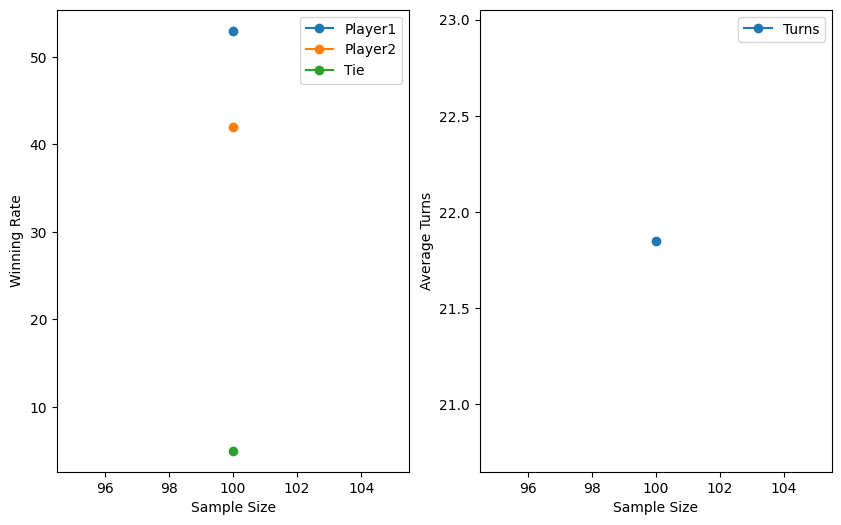

In [1]:
import random
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import copy
import multiprocessing
import asyncio

random.seed()

class Mancala:
    def __init__(self, pits_per_player=3, stones_per_pit=2):
        """
        The constructor for the Mancala class defines several instance variables:

        pits_per_player: This variable stores the number of pits each player has.
        stones_per_pit: It represents the number of stones each pit contains at the start of any game.
        board: This data structure is responsible for managing the Mancala board.
        current_player: This variable takes the value 1 or 2, as it's a two-player game, indicating which player's turn it is.
        moves: This is a list used to store the moves made by each player. It's structured in the format (current_player, chosen_pit).
        p1_pits_index: A list containing two elements representing the start and end indices of player 1's pits in the board data structure.
        p2_pits_index: Similar to p1_pits_index, it contains the start and end indices for player 2's pits on the board.
        p1_mancala_index and p2_mancala_index: These variables hold the indices of the Mancala pits on the board for players 1 and 2, respectively.
        """
        self.pits_per_player = pits_per_player
        self.board = [stones_per_pit] * ((pits_per_player + 1) * 2)  # Initialize each pit with stones_per_pit number of stones
        self.players = 2
        self.current_player = 1
        self.moves = []
        self.p1_pits_index = [0, self.pits_per_player - 1]
        self.p1_mancala_index = self.pits_per_player
        self.p2_pits_index = [self.pits_per_player + 1, len(self.board) - 1 - 1]
        self.p2_mancala_index = len(self.board) - 1

        # Zeroing the Mancala for both players
        self.board[self.p1_mancala_index] = 0
        self.board[self.p2_mancala_index] = 0

        # Record the number of turns
        self.turns = {"p1": 0, "p2": 0}

    def display_board(self):
        """
        Displays the board in a user-friendly format
        """
        player_1_pits = self.board[self.p1_pits_index[0] : self.p1_pits_index[1] + 1]
        player_1_mancala = self.board[self.p1_mancala_index]
        player_2_pits = self.board[self.p2_pits_index[0] : self.p2_pits_index[1] + 1]
        player_2_mancala = self.board[self.p2_mancala_index]

        print("P1               P2")
        print("     ____{}____     ".format(player_2_mancala))
        for i in range(self.pits_per_player):
            if i == self.pits_per_player - 1:
                print(
                    "{} -> |_{}_|_{}_| <- {}".format(i + 1, player_1_pits[i], player_2_pits[-(i + 1)], self.pits_per_player - i)
                )
            else:
                print(
                    "{} -> | {} | {} | <- {}".format(i + 1, player_1_pits[i], player_2_pits[-(i + 1)], self.pits_per_player - i)
                )

        print("         {}         ".format(player_1_mancala))
        turn = "P1" if self.current_player == 1 else "P2"
        print("Turn: " + turn)

    def valid_move(self, pit):
        """
        Function to check if the pit chosen by the current_player is a valid move.
        """

        # write your code here
        if self.current_player == 1:
            pit_index = pit - 1
            valid_range = range(self.p1_pits_index[0], self.p1_pits_index[1] + 1)
        else:
            pit_index = self.p2_pits_index[0] + (pit - 1)
            valid_range = range(self.p2_pits_index[0], self.p2_pits_index[1] + 1)

        if pit_index not in valid_range or self.board[pit_index] == 0:
            print("Invalid move\n")
            return False

        self.actual_pit_index = pit_index
        return True

    def random_move_generator(self):
        """
        Function to generate random valid moves with non-empty pits for the random player
        """

        # write your code here
        if self.current_player == 1:
            pits_range = range(self.p1_pits_index[0], self.p1_pits_index[1] + 1)
        else:
            pits_range = range(self.p2_pits_index[0], self.p2_pits_index[1] + 1)
        non_empty = [i for i in pits_range if self.board[i] > 0]
        if not non_empty:
            return None

        chosen_board_index = random.choice(non_empty)

        if self.current_player == 1:
            return chosen_board_index - self.p1_pits_index[0] + 1
        else:
            return chosen_board_index - self.p2_pits_index[0] + 1

    def play(self, pit):
        """
        This function simulates a single move made by a specific player using their selected pit. It primarily performs three tasks:
        1. It checks if the chosen pit is a valid move for the current player. If not, it prints "INVALID MOVE" and takes no action.
        2. It verifies if the game board has already reached a winning state. If so, it prints "GAME OVER" and takes no further action.
        3. After passing the above two checks, it proceeds to distribute the stones according to the specified Mancala rules.

        Finally, the function then switches the current player, allowing the other player to take their turn.
        """

        # write your code here
        if not self.valid_move(pit):
            return
        self.turns[f"p{self.current_player}"] += 1
        # 核心：这里直接打印"Player X chose pit Y"
        # print(f"Player {self.current_player} chose pit: {pit}")

        pit_index = self.actual_pit_index
        stones = self.board[pit_index]
        self.board[pit_index] = 0
        current_index = pit_index

        while stones > 0:
            current_index = (current_index + 1) % len(self.board)
            # Skip opponent's mancala
            if self.current_player == 1 and current_index == self.p2_mancala_index:
                continue
            if self.current_player == 2 and current_index == self.p1_mancala_index:
                continue
            self.board[current_index] += 1
            stones -= 1


        if self.board[current_index] == 1:
            if self.current_player == 1 and current_index in range(self.p1_pits_index[0], self.p1_pits_index[1] + 1):
                opposite_index = self.p2_pits_index[1] - (current_index - self.p1_pits_index[0])
                captured = self.board[opposite_index]
                if captured > 0:
                    self.board[self.p1_mancala_index] += captured + 1
                    self.board[opposite_index] = 0
                    self.board[current_index] = 0

            elif self.current_player == 2 and current_index in range(self.p2_pits_index[0], self.p2_pits_index[1] + 1):
                opposite_index = self.p1_pits_index[1] - (current_index - self.p2_pits_index[0])
                captured = self.board[opposite_index]
                if captured > 0:
                    self.board[self.p2_mancala_index] += captured + 1
                    self.board[opposite_index] = 0
                    self.board[current_index] = 0
        
        
        self.moves.append((self.current_player, pit))
        self.current_player = 2 if self.current_player == 1 else 1

    def winning_eval(self):
        """
        Function to verify if the game board has reached the winning state.
        Hint: If either of the players' pits are all empty, then it is considered a winning state.
        """
        # write your code here
        # Check if any side is empty
        p1_empty = all(self.board[i] == 0 for i in range(self.p1_pits_index[0], self.p1_pits_index[1] + 1))
        p2_empty = all(self.board[i] == 0 for i in range(self.p2_pits_index[0], self.p2_pits_index[1] + 1))
        if not p1_empty and not p2_empty:
            return None  # Game not over yet

        # Collect remaining stones for the non-empty player
        if p1_empty:
            for i in range(self.p2_pits_index[0], self.p2_pits_index[1] + 1):
                self.board[self.p2_mancala_index] += self.board[i]
                self.board[i] = 0
        elif p2_empty:
            for i in range(self.p1_pits_index[0], self.p1_pits_index[1] + 1):
                self.board[self.p1_mancala_index] += self.board[i]
                self.board[i] = 0

        # Calculate scores
        p1_score = self.board[self.p1_mancala_index]
        p2_score = self.board[self.p2_mancala_index]

        print(f"Game Over! P1 Score: {p1_score}, P2 Score: {p2_score}")
        if p1_score > p2_score:
            print("Player 1 wins!")
            return 1
        elif p2_score > p1_score:
            print("Player 2 wins!")
            return 2
        else:
            print("It's a tie!")
            return 0
        

def do_one_game(verbose=False):
    """
    进行一局游戏，并返回胜利者
    Returns:
        int: 胜利者，1为玩家1，2为玩家2，0为平局
    """

    game = Mancala(pits_per_player=6, stones_per_pit=4)
    if verbose:
        game.display_board()

    while True:
        # Player 1 
        move = game.random_move_generator()
        game.play(move)
        if verbose:
            game.display_board()
        if game.winning_eval() is not None:
            break

        # Player 2 随机动作
        ai_move = game.random_move_generator()
        if ai_move:
            game.play(ai_move)
            if verbose:
                game.display_board()
            if game.winning_eval() is not None:
                break

    winner = game.winning_eval()
    return winner, game.turns["p2" if winner == 2 else "p1"]


# 样本量
# exps = [100, 500, 1000, 2000, 3000]
exps = {
    100: dict(p1_wins=0, p2_wins=0, ties=0, turns=[]),
    # 500: dict(p1_wins=0, p2_wins=0, ties=0, turns=[]),
    # 1000: dict(p1_wins=0, p2_wins=0, ties=0, turns=[]),
    # 2000: dict(p1_wins=0, p2_wins=0, ties=0, turns=[]),
    # 3000: dict(p1_wins=0, p2_wins=0, ties=0, turns=[]),
}

for N, stats in exps.items():
    print(f"Sample size: {N}")
    for _ in tqdm(range(N)):
        winner, turns = do_one_game()
        if winner == 1:
            stats["p1_wins"] += 1
        elif winner == 2:
            stats["p2_wins"] += 1
        else:
            stats["ties"] += 1
        stats["turns"].append(turns)
    print(f"Player 1 Win Rate: {stats['p1_wins'] / N}")
    print(f"Player 2 Win Rate: {stats['p2_wins'] / N}")
    print(f"Draw Rate: {stats['ties'] / N}")
    avg_turns = sum(stats["turns"]) / len(stats["turns"])
    print(f"Average number of rounds per game: {avg_turns:.2f}\n")



# Printing the list of moves
# print("\nList of valid moves:")
# for move in game.moves:
#     player, pit = move
#     print(f"Player {player} selected pit {pit}")


# exps to dataframe
for k, v in exps.items():
    v["turns"] = sum(v["turns"]) / len(v["turns"])
df = pd.DataFrame(exps).T

# 绘制胜率曲线
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
data_numpy = np.array(list(exps.keys()))

axs[0].plot(df.index, df["p1_wins"], label="Player1", marker="o")
axs[0].plot(df.index, df["p2_wins"], label="Player2", marker="o")
axs[0].plot(df.index, df["ties"], label="Tie", marker="o")
axs[0].legend()
axs[0].set_xlabel("Sample Size")
axs[0].set_ylabel("Winning Rate")

# 绘制平均turns曲线
axs[1].plot(df.index, df["turns"], label="Turns", marker="o")
axs[1].legend()
axs[1].set_xlabel("Sample Size")
axs[1].set_ylabel("Average Turns")

plt.show()

As of now, I have fully implemented the Mancala game engine using Python, following all required rules as outlined in the project description and video:

6 pits per player, 4 stones per pit

Correct counter-clockwise stone distribution

Skipping opponent’s Mancala

No extra turn when last stone lands in own Mancala

Capture rule implemented correctly: if the last stone lands in an empty pit on the player’s side and the opposite pit has stones, both are captured and moved to the player’s Mancala

Game end and winner determination logic implemented

In the 100-game test, the win rates of Player 1 and Player 2 are nearly identical. Based on the data, no clear first-move advantage is observed with purely random players.

I changed random.seed(109) to random.seed() so that the result is different each time I run the code.